# Data manipulation for the final project

## Table of contents
* [Data pre-processing](#processing)
* [Data visualization](#visualization)
* [Modeling](#modeling)

<a name="processing">
    <h3>Data pre-processing</h3>
</a>
Encoding, normalization, imputation…

* Loading

In [1]:
import pandas as pd

In [2]:
columns = ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 
           'interlinear spacing', 'weight', 'peak number', 'modular ratio / interlinear spacing', 'class']

In [3]:
train_data = pd.read_csv('avila/avila-tr.txt', names=columns)
train_data.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio / interlinear spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
test_data = pd.read_csv('avila/avila-ts.txt', names=columns)
test_data.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio / interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


* Cleaning

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   intercolumnar distance               10430 non-null  float64
 1   upper margin                         10430 non-null  float64
 2   lower margin                         10430 non-null  float64
 3   exploitation                         10430 non-null  float64
 4   row number                           10430 non-null  float64
 5   modular ratio                        10430 non-null  float64
 6   interlinear spacing                  10430 non-null  float64
 7   weight                               10430 non-null  float64
 8   peak number                          10430 non-null  float64
 9   modular ratio / interlinear spacing  10430 non-null  float64
 10  class                                10430 non-null  object 
dtypes: float64(10), object(1)
me

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   intercolumnar distance               10437 non-null  float64
 1   upper margin                         10437 non-null  float64
 2   lower margin                         10437 non-null  float64
 3   exploitation                         10437 non-null  float64
 4   row number                           10437 non-null  float64
 5   modular ratio                        10437 non-null  float64
 6   interlinear spacing                  10437 non-null  float64
 7   weight                               10437 non-null  float64
 8   peak number                          10437 non-null  float64
 9   modular ratio / interlinear spacing  10437 non-null  float64
 10  class                                10437 non-null  object 
dtypes: float64(10), object(1)
me

The data has already been cleaned; there is no missing values and they seem to be in the adequate format, so there is nothing more to do.

* Encoding & Splitting

In [7]:
from sklearn.preprocessing import LabelEncoder 

In [8]:
label_encoder = LabelEncoder()

In [9]:
y_train = label_encoder.fit_transform(train_data['class'])
y_train

array([ 0,  0,  0, ...,  0,  4, 10])

In [10]:
min(y_train), max(y_train)

(0, 11)

In [11]:
y_test = label_encoder.fit_transform(test_data['class'])
y_test

array([9, 0, 8, ..., 0, 5, 7])

In [12]:
min(y_test), max(y_test)

(0, 11)

In [13]:
x_train = train_data.drop('class', axis=1)
x_train.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio / interlinear spacing
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652


In [14]:
x_test = test_data.drop('class', axis=1)
x_test.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio / interlinear spacing
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681


* Combining the two datasets for visualization

In [15]:
avila = pd.concat([train_data, test_data])
avila.tail()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio / interlinear spacing,class
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F
10436,0.377169,0.014957,0.381439,0.292753,0.261718,-1.470679,-0.006326,-0.494919,-0.247731,-1.212974,H


<a name="visualization">
    <h3>Data visualization</h3>
</a>
Showing the link between the variables and the target.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [18]:
plt.style.use('fivethirtyeight')

* Class Distribution Plot

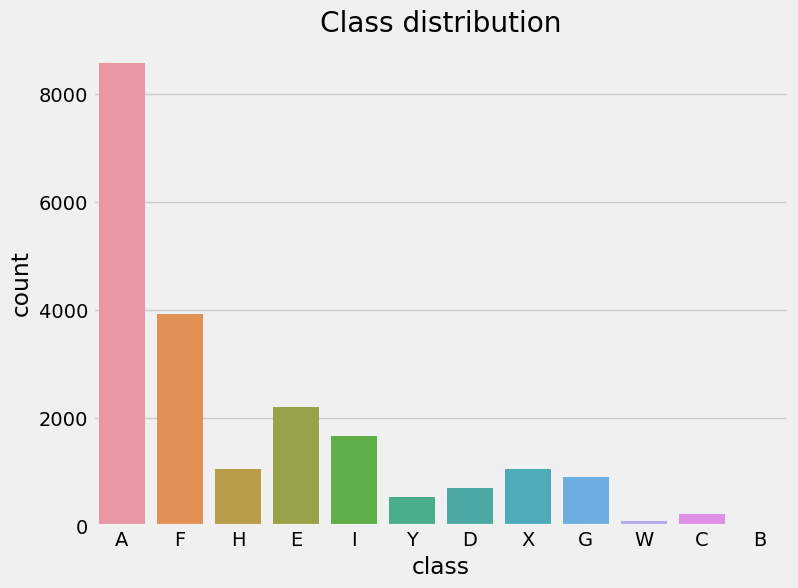

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=avila)
plt.title('Class distribution')
plt.show()

* Correlation matrix

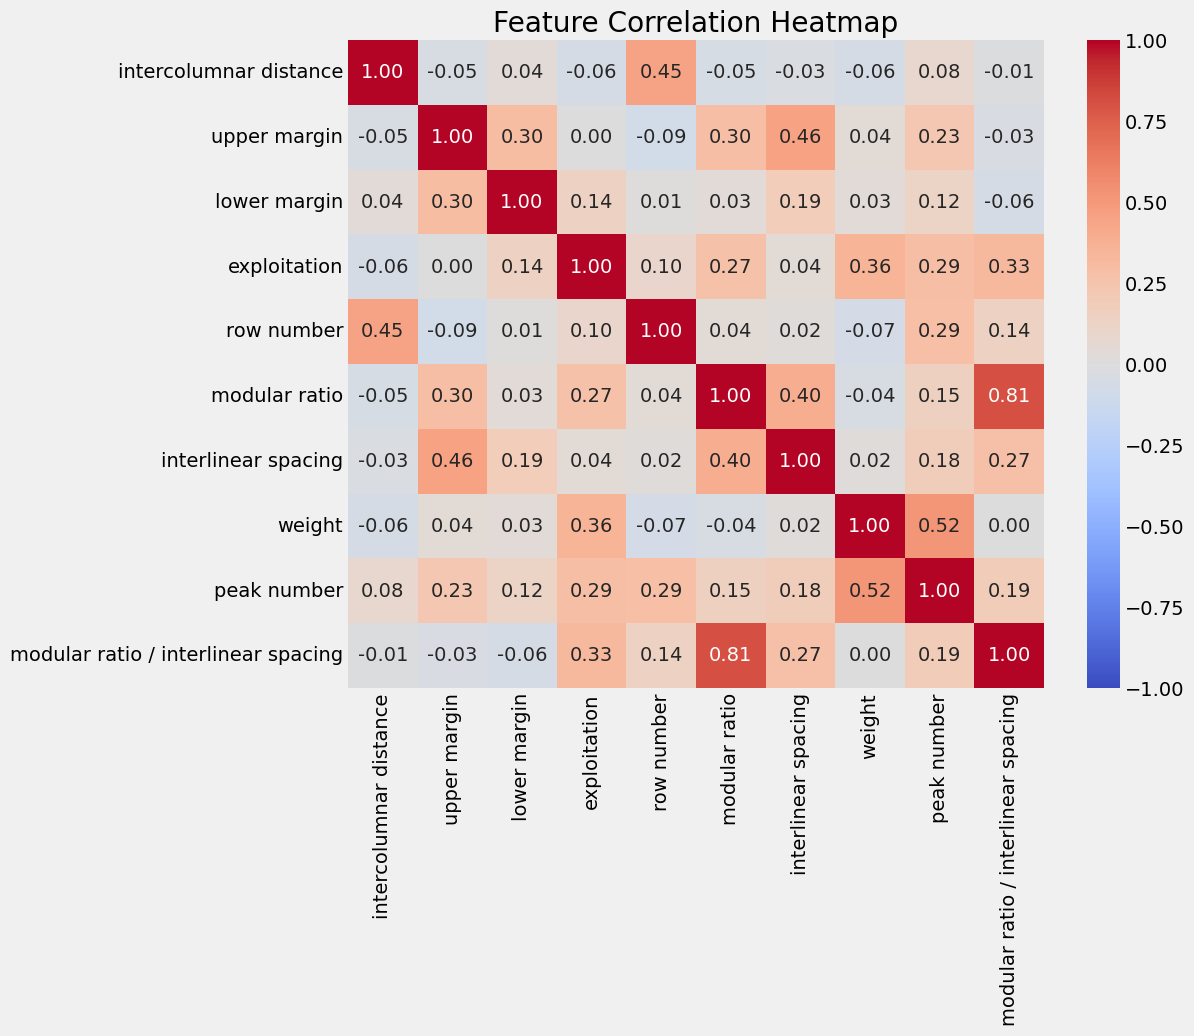

In [20]:
correlation_matrix = avila.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", 
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

* Pair plots with Panel

In [21]:
import panel as pn

In [22]:
pn.extension()

In [23]:
avila.columns

Index(['intercolumnar distance', 'upper margin', 'lower margin',
       'exploitation', 'row number', 'modular ratio', 'interlinear spacing',
       'weight', 'peak number', 'modular ratio / interlinear spacing',
       'class'],
      dtype='object')

In [24]:
x = pn.widgets.Select(name='x', options=list(avila.columns), value='intercolumnar distance')
x

Select(name='x', options=['intercolumnar distance',...], value='intercolumnar distance')

In [25]:
y = pn.widgets.Select(name='y', options=list(avila.columns), value='peak number')
y

Select(name='y', options=['intercolumnar distance',...], value='peak number')

In [26]:
def scatter(x, y):
    fig = plt.figure(figsize=(10.7, 8))
    ax = fig.subplots()
    sns.scatterplot(avila, x=x, y=y, hue='class', ax=ax)
    ax.set_title('Pair Plot of Features by Class')
    plot = pn.pane.Matplotlib(fig, dpi=144, tight=True)
    plt.close(fig) # Close the figure to avoid displaying it in the cell
    return plot

In [27]:
interactive_plot = pn.bind(scatter, x, y)

Column
    [0] WidgetBox
        [0] Column
            [0] Select(name='x', options=['intercolumnar distance',...], value='intercolumnar distance')
            [1] Select(name='y', options=['intercolumnar distance',...], value='peak number')
    [1] ParamFunction(function, _pane=Matplotlib)
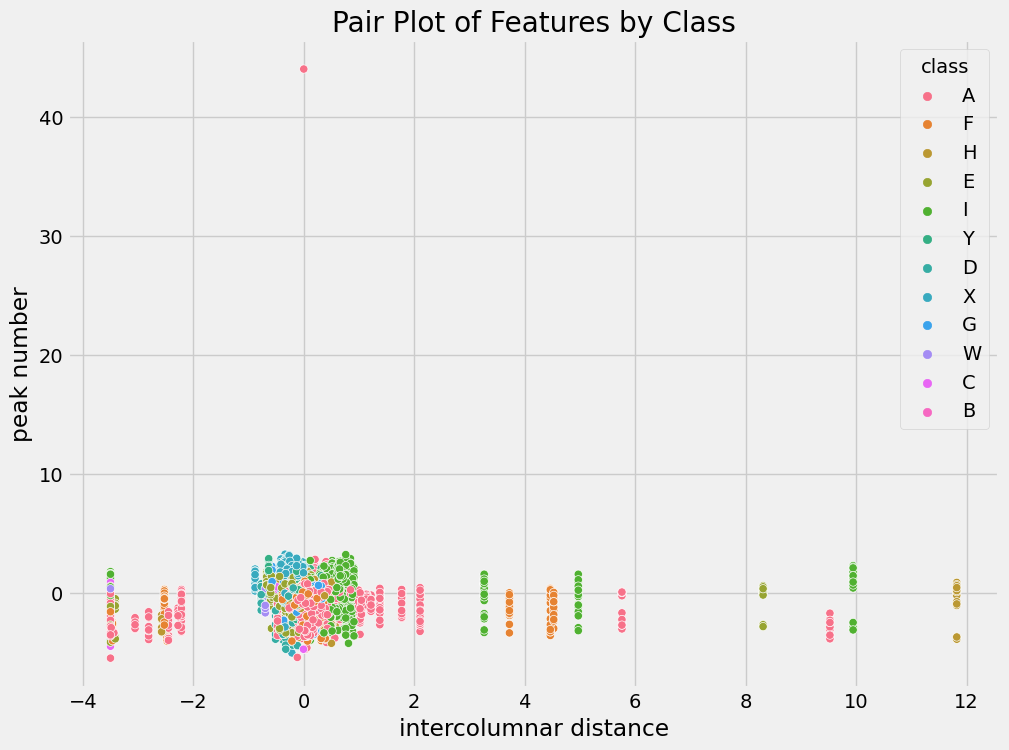

In [28]:
pairplot = pn.Column(pn.WidgetBox(pn.Column(x, y)),
                     interactive_plot)
pairplot

<a name="modeling">
    <h3>Modeling</h3>
</a>
Using the scikit-learn library to try several algorithms, change the hyper parameters, do a grid search, compare the results of your models using graphics